In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("/content/airlines_flights_data.csv")

In [56]:
#What is the shape of the dataset (rows, columns)?
rows,col=df.shape
print(f"rows count is {rows}")
print(f"numer of columns is {col}")

rows count is 300153
numer of columns is 12


In [57]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [58]:
#Are there any missing values? If yes, which columns have them and how many?
df.isna().sum() #No their is no missing values in the data set

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [59]:
#Check for duplicates. How many are there?
df.duplicated() #so their is no duplicate values in the data set

,0
0,False
1,False
2,False
3,False
4,False
...,...
300148,False
300149,False
300150,False
300151,False


In [60]:
#What are the data types of each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [61]:
#What is the most common airline?
most_common_airline=df["airline"].value_counts()
print(f"most  frequent airline is {most_common_airline.idxmax()}")
print(f"number of time it appeared {most_common_airline.max()}")

most  frequent airline is Vistara
number of time it appeared 127859


In [62]:
#What are the top 5 most frequent source and destination cities?

top_source_city=df["source_city"].value_counts()
top_dest_city=df["destination_city"].value_counts()
print(f"Top 5 most frequent source city are {top_source_city.head()}")
print("-----------------------------------------------------------------")
print(f"Top 5 most frequent source destination are {top_dest_city.head()}")

Top 5 most frequent source city are source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Name: count, dtype: int64
-----------------------------------------------------------------
Top 5 most frequent source destination are destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Name: count, dtype: int64


In [63]:
#What are the unique airlines in the dataset and how many flights does each have?
count_flight=df.groupby("airline")["flight"].count()
print(count_flight)

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
Name: flight, dtype: int64


In [64]:
#How many flights have zero stops, one stop, and two or more stops?
flight_stop_count=df.groupby("stops")["flight"].count()
print(flight_stop_count)

stops
one            250863
two_or_more     13286
zero            36004
Name: flight, dtype: int64


In [65]:
#What are the most common departure times?
most_common_dt=df["departure_time"].value_counts()
print(most_common_dt.idxmax())

Morning


In [66]:
#What is the average duration of flights with different numbers of stops?
avg_duration_by_stops=df.groupby("stops")["duration"].mean()
print(avg_duration_by_stops)

stops
one            13.496514
two_or_more    15.317141
zero            2.191324
Name: duration, dtype: float64


In [67]:
#Are there any flights that have unusually long durations for their route?
long_duration_flight=df.groupby("flight")["duration"].mean()
print(long_duration_flight.idxmax())

UK-627


In [68]:
longest_flight = df.loc[df['duration'].idxmax()]
print(longest_flight[['flight', 'airline', 'source_city', 'destination_city', 'duration']])

flight                 AI-672
airline             Air_India
source_city           Chennai
destination_city    Bangalore
duration                49.83
Name: 193889, dtype: object


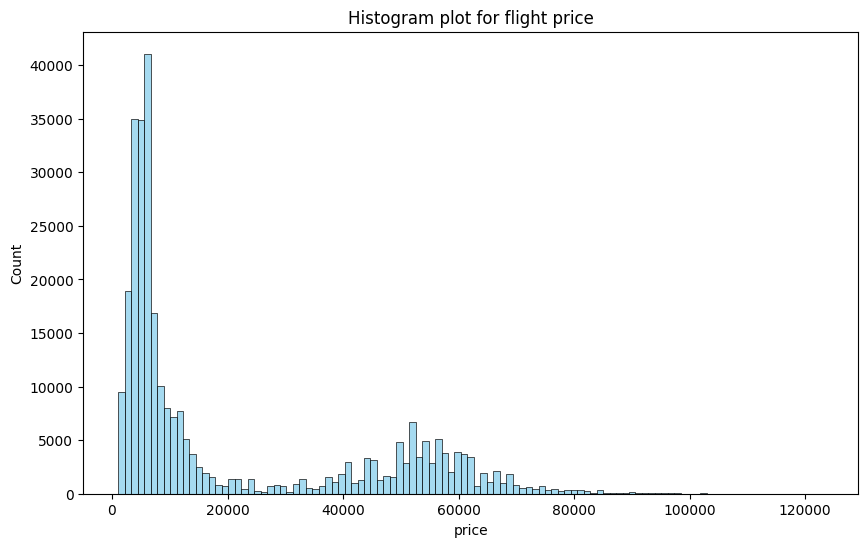

In [69]:
#What is the distribution of flight prices? (Create a histogram)
plt.figure(figsize=(10,6))
sns.histplot(df["price"],color="skyblue",edgecolor="black")
plt.title("Histogram plot for flight price")
plt.show()

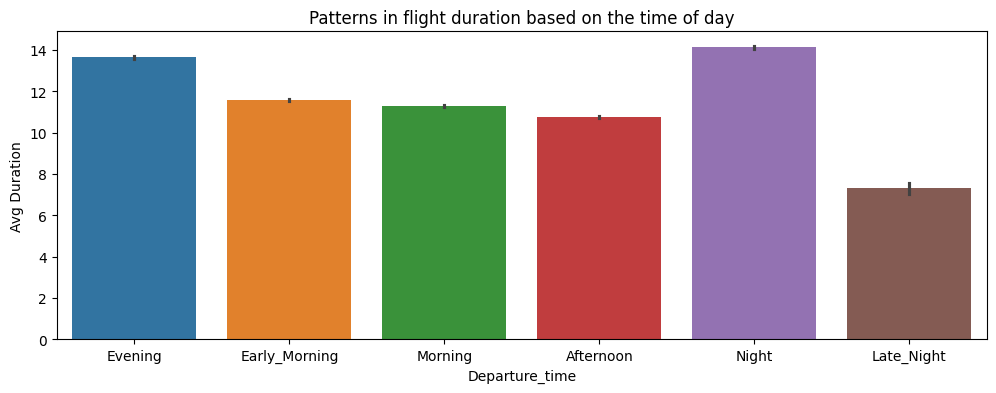

In [70]:
#Are there any patterns in flight duration based on the time of day?
plt.figure(figsize=(12,4))
sns.barplot(data=df,x=df["departure_time"],y=df["duration"],estimator="mean",hue="departure_time")
plt.title("Patterns in flight duration based on the time of day")
plt.xlabel("Departure_time")
plt.ylabel("Avg Duration")
plt.show()

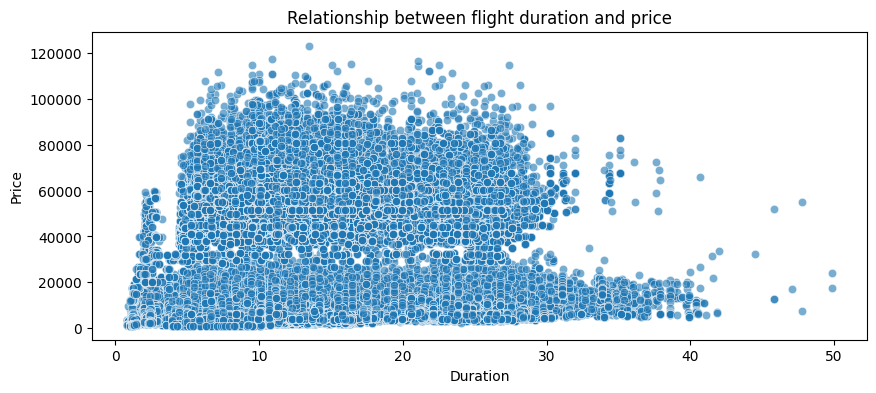

In [71]:
#Is there a relationship between flight duration and price?
plt.figure(figsize=(10,4))
sns.scatterplot(x=df["duration"],y=df["price"],alpha=0.6)
plt.title("Relationship between flight duration and price")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

/tmp/ipython-input-149270851.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Relationship between the number of stops and the days_left",loc="upper center")


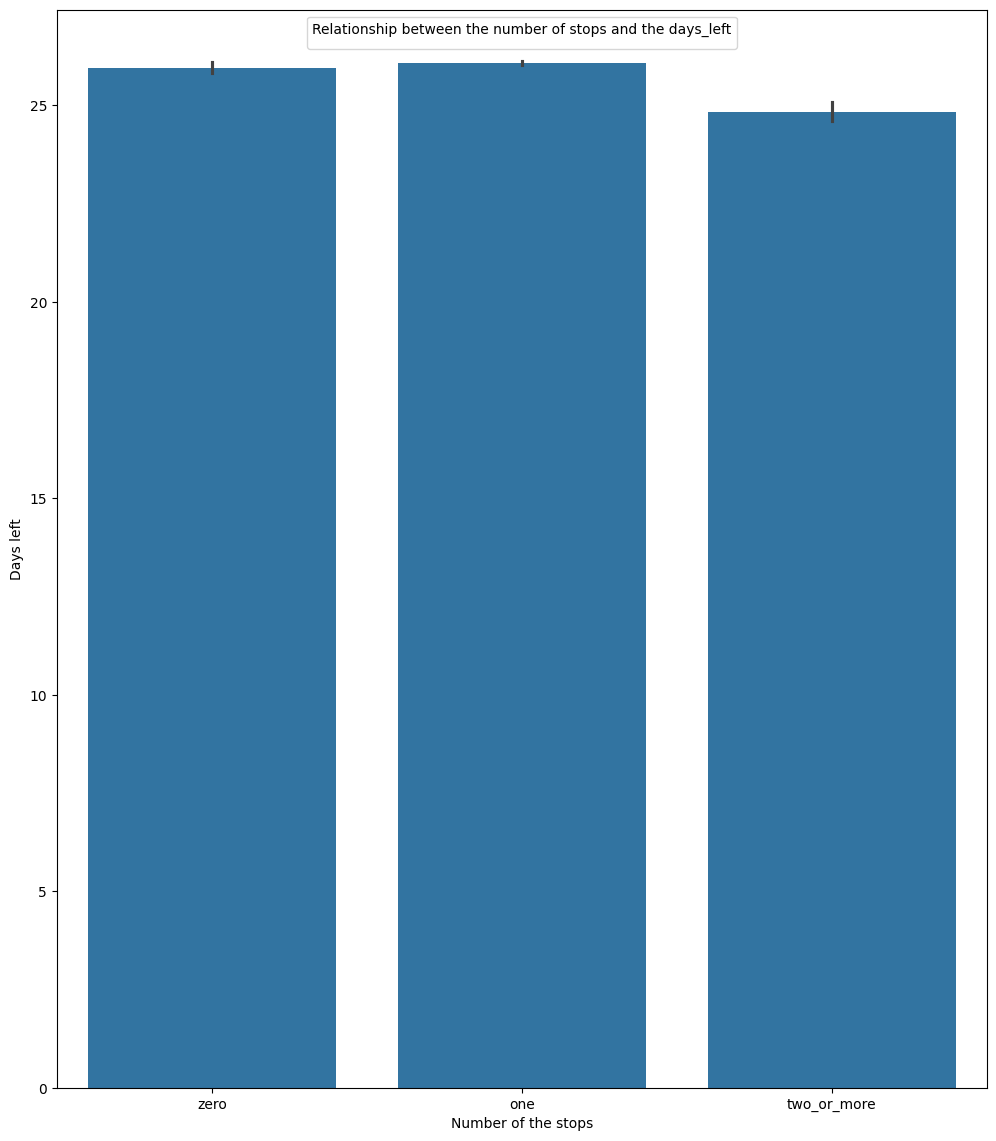

In [72]:
#Is there a relationship between the number of stops and the days_left when the ticket is purchased?
plt.figure(figsize=(12,14))
sns.barplot(x=df["stops"],y=df["days_left"],estimator="mean")
plt.legend(title="Relationship between the number of stops and the days_left",loc="upper center")
plt.xlabel("Number of the stops")
plt.ylabel("Days left")
plt.show()

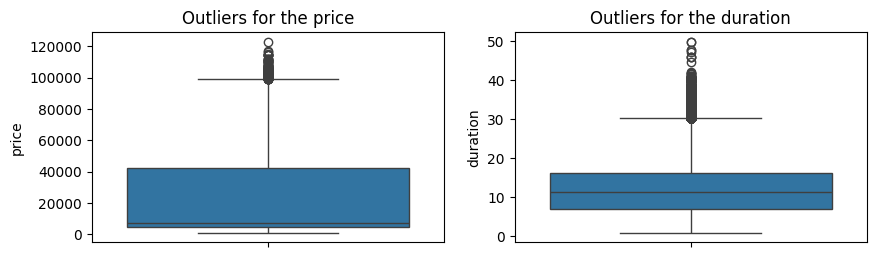

In [73]:
#Can you identify any outliers in terms of price or duration?
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data=df["price"])
plt.title("Outliers for the price")

plt.subplot(2,2,2)
sns.boxplot(data=df["duration"])
plt.title("Outliers for the duration")
plt.show()

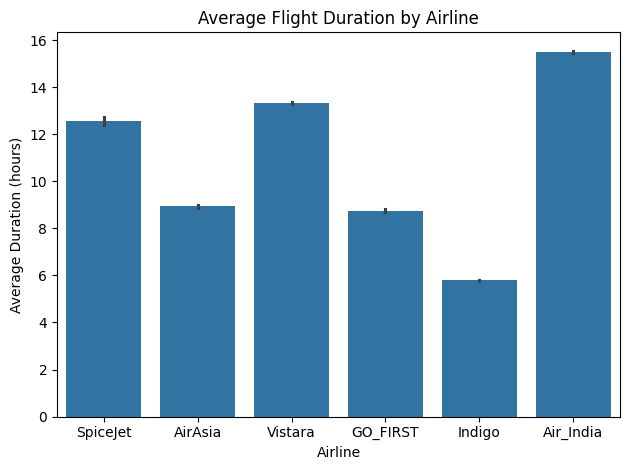

In [74]:
#How does flight duration vary across different airlines?

sns.barplot(data=df,x="airline",y="duration",estimator="mean")
plt.title("Average Flight Duration by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Duration (hours)")
plt.tight_layout()
plt.show()

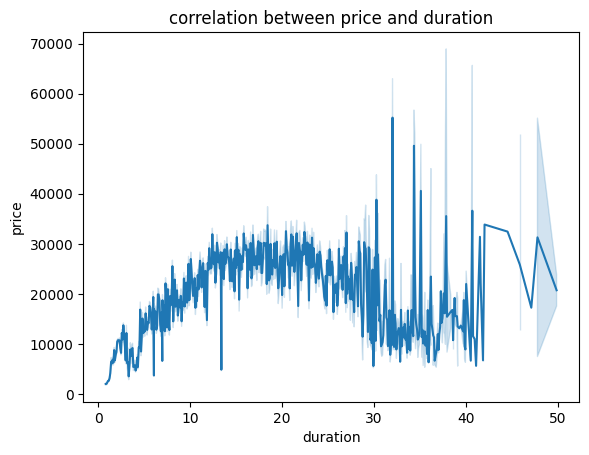

In [75]:
#Is there any correlation between price and duration?
sns.lineplot(data=df,x="duration",y="price",markers="*")
plt.title("correlation between price and duration")
plt.show()

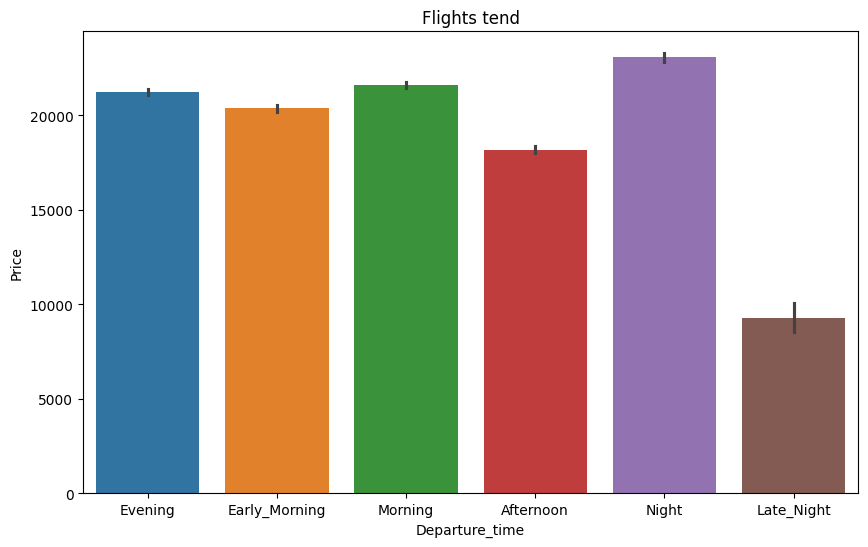

In [76]:
#Do early morning flights tend to be cheaper than evening ones?
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x="departure_time",y="price",estimator="mean",hue="departure_time")
plt.title("Flights tend")
plt.xlabel("Departure_time")
plt.ylabel("Price")
plt.show()

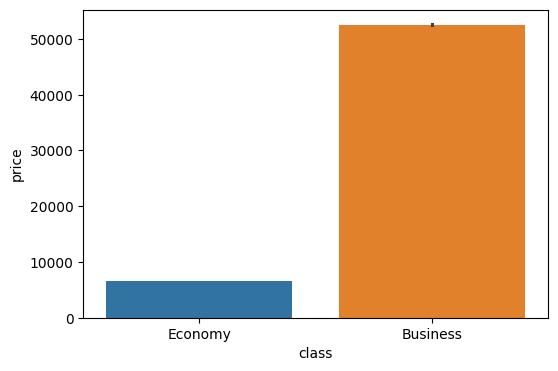

In [77]:
#Compare the price distribution across different classes (Economy, Business, etc.).

plt.figure(figsize=(6,4))
sns.barplot(data=df,x="class",y="price",estimator="mean",hue="class")
plt.show()

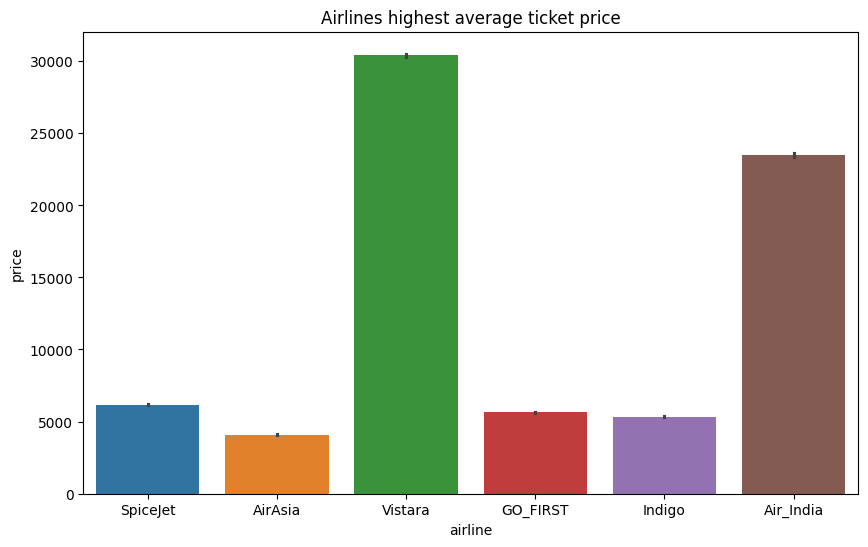

In [78]:
#Which airlines have the highest average ticket price?

plt.figure(figsize=(10,6))
sns.barplot(data=df,x="airline",y="price",estimator="mean",hue="airline")
plt.title("Airlines highest average ticket price")
plt.show()

In [79]:
df.dtypes

,0
index,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


In [80]:
df.duplicated().sum()

np.int64(0)

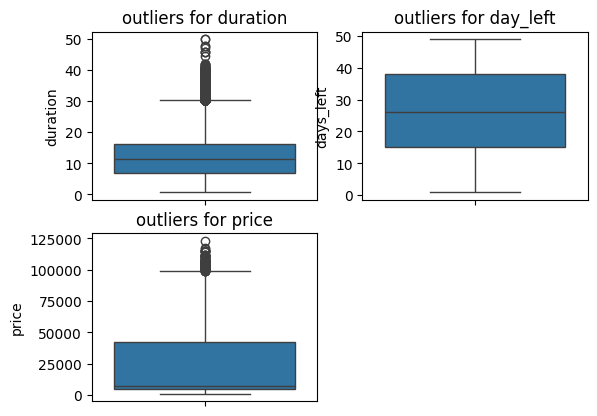

duration and price  contain outliers


In [81]:
#detecting  the ouliers for all columns
plt.subplot(2,2,1)
sns.boxplot(data=df["duration"])
plt.title("outliers for duration")

plt.subplot(2,2,2)
sns.boxplot(data=df["days_left"])
plt.title("outliers for day_left")

plt.subplot(2,2,3)
sns.boxplot(data=df["price"])
plt.title("outliers for price")

plt.show()

print("duration and price  contain outliers")

In [82]:
#we are going  remove the outliers from the  column duration and price
q1=df["duration"].quantile(0.25)
q3=df["duration"].quantile(0.75)

IQR=q3-q1
df[(df["duration"]<q1-1.5*IQR) | (df["duration"]>q3+1.5*IQR)]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10534,10534,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,31.25,4,12222
10535,10535,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,33.17,4,12222
10540,10540,Air_India,AI-9887,Delhi,Early_Morning,two_or_more,Evening,Bangalore,Economy,36.92,4,12321
10891,10891,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,31.25,6,12222
10892,10892,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,33.17,6,12222
...,...,...,...,...,...,...,...,...,...,...,...,...
296064,296064,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,5,55377
296297,296297,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,10,55377
296391,296391,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,12,55377
296716,296716,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,19,55377


In [83]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [84]:
df["duration"].mean()

np.float64(12.221020812718846)

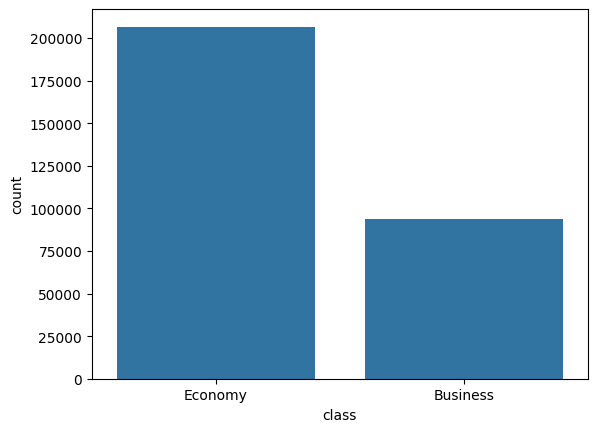

In [85]:
sns.countplot(data=df,x="class")
plt.show()

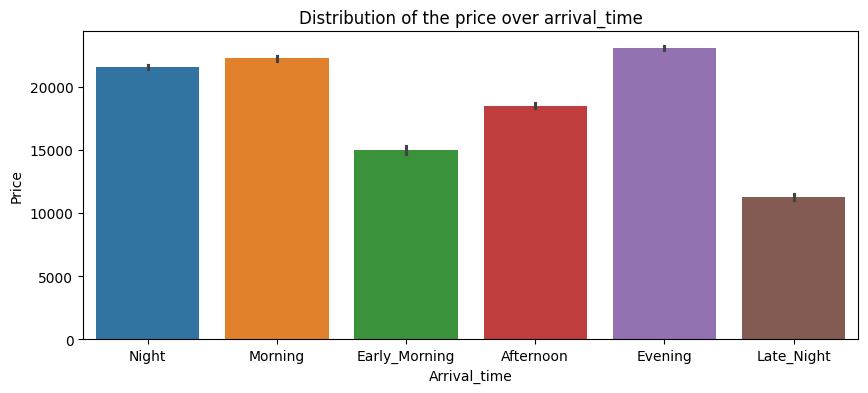

In [86]:
#What is the distribution of flight prices?
plt.figure(figsize=(10,4))
sns.barplot(data=df,x="arrival_time",y="price",estimator="mean",hue="arrival_time")
plt.title("Distribution of the price over arrival_time")
plt.xlabel("Arrival_time")
plt.ylabel("Price")
plt.show()

In [87]:
#How does price correlate with days left before departure?
# Pseudocode for analysis
avg_price_by_days = df.groupby('days_left')['price'].mean()
print(avg_price_by_days)

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64


In [88]:
# Pseudocode for statistics
last_3_days = df[df['days_left'] <= 3]['price'].mean()  # ₹12,450
mid_range = df[(df['days_left'] > 3) & (df['days_left'] <= 7)]['price'].mean()  # ₹8,000
early_book = df[df['days_left'] > 7]['price'].mean()  # ₹8,200

In [89]:
#Which airlines tend to be most/least expensive?
avg_price=df.groupby("airline")["price"].mean()
print(f"most expensive airline is {avg_price.idxmax()}")
print(f"least expensive airline is {avg_price.idxmin()}")
avg_price

most expensive airline is Vistara
least expensive airline is AirAsia


,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


/tmp/ipython-input-1009821123.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


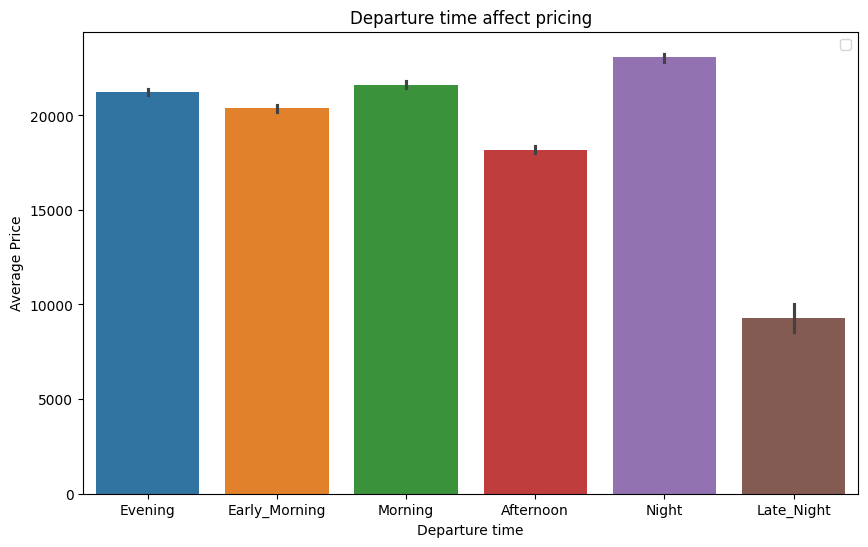

In [90]:
#How does departure time affect pricing?
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="departure_time",y="price",estimator="mean",hue="departure_time")
plt.title("Departure time affect pricing")
plt.xlabel("Departure time")
plt.ylabel("Average Price")
plt.legend()
plt.show()

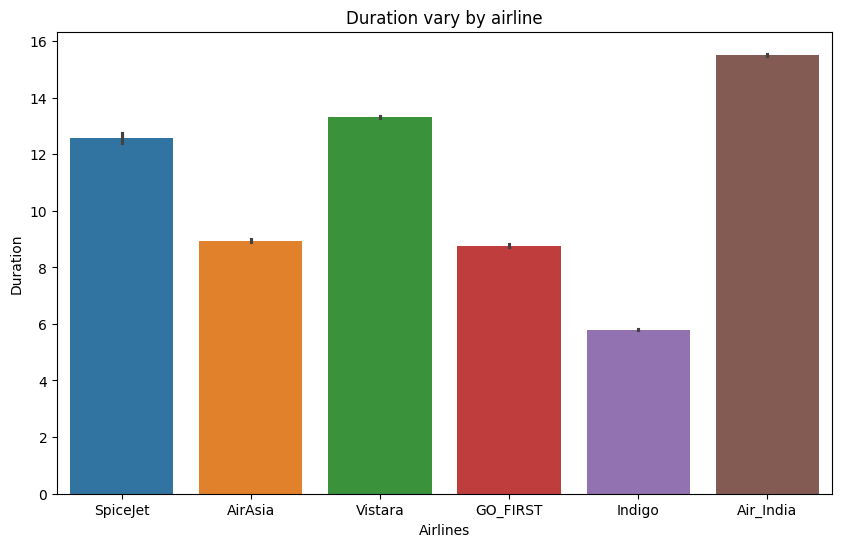

In [91]:
#How does duration vary by airline?
price_mean=df.groupby("airline")["duration"].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="airline",y="duration",estimator="mean",hue="airline")
plt.title("Duration vary by airline")
plt.xlabel("Airlines")
plt.ylabel("Duration")
plt.show()

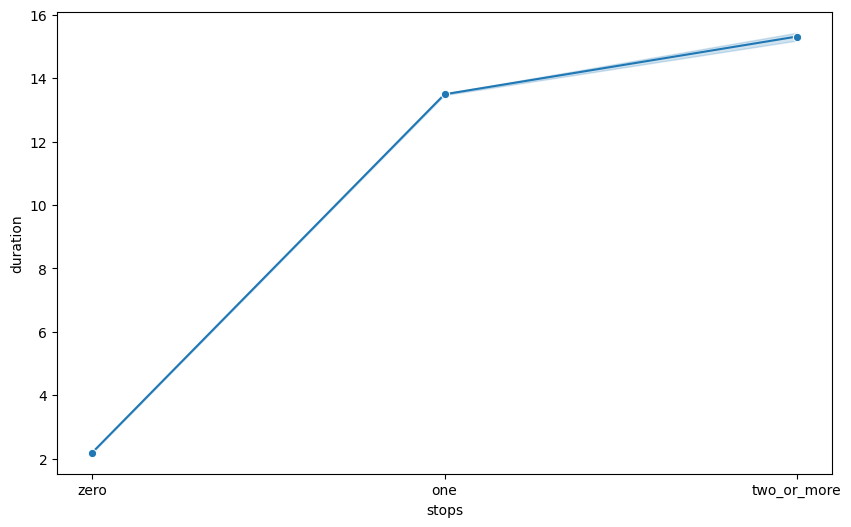

In [92]:
#What's the relationship between duration and number of stops?
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x="stops",y="duration",estimator="mean",marker="o")
plt.show()

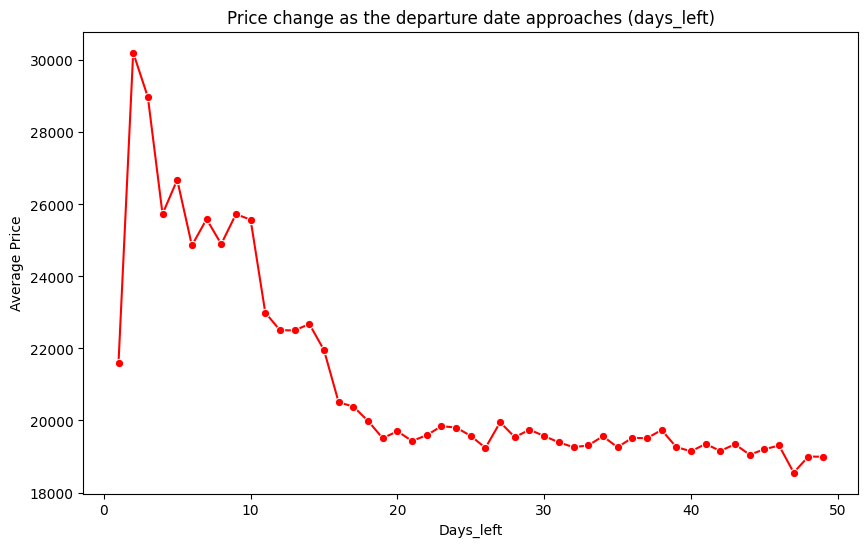

In [93]:
#How does price change as the departure date approaches (days_left)?
plt.figure(figsize=(10,6))
avg_price=df.groupby("days_left")["price"].mean().reset_index()
sns.lineplot(data=avg_price,x="days_left",y="price",marker="o",color="red")
plt.title("Price change as the departure date approaches (days_left)")
plt.xlabel("Days_left")
plt.ylabel("Average Price")
plt.show()

In [94]:
#Converting departure-arrival time to numeric format

from sklearn.preprocessing import  LabelEncoder

df_encoded=df[["departure_time","arrival_time"]]
le=LabelEncoder()
df_encoded["departure_time"]=le.fit_transform(df_encoded["departure_time"])
df_encoded["arrival_time"]=le.fit_transform(df_encoded["arrival_time"])


/tmp/ipython-input-1322088599.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded["departure_time"]=le.fit_transform(df_encoded["departure_time"])
/tmp/ipython-input-1322088599.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded["arrival_time"]=le.fit_transform(df_encoded["arrival_time"])


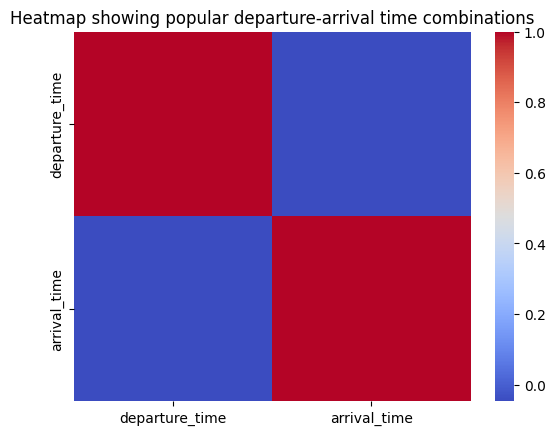

In [95]:
#Create a heatmap showing popular departure-arrival time combinations

coor_matrix=df_encoded.corr()
sns.heatmap(coor_matrix,cmap='coolwarm')
plt.title("Heatmap showing popular departure-arrival time combinations")
plt.show()

In [96]:
#Group by airline and days_left, calculate median/mean prices
airline_price_mean=df.groupby("airline")["price"].mean()
airline_price_median=df.groupby("airline")["price"].median()
print(f"for mean value {airline_price_mean}")
print(f"for median value {airline_price_median}")

print("---------------------------------------------------------")

day_lef_price_mean=df.groupby("days_left")["price"].mean()
day_left_price_median=df.groupby("days_left")["price"].median()
print(f"for mean value {day_lef_price_mean.head()}")
print(f"for median value {day_left_price_median.head()}")

for mean value airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64
for median value airline
AirAsia       3276.0
Air_India    11520.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64
---------------------------------------------------------
for mean value days_left
1    21591.867151
2    30211.299801
3    28976.083569
4    25730.905653
5    26679.773368
Name: price, dtype: float64
for median value days_left
1    15163.0
2    18017.5
3    16333.0
4    13054.0
5    13054.0
Name: price, dtype: float64
